In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

In [4]:
read_data = pd.read_excel("sodium_batteries.xlsx", skiprows=1)

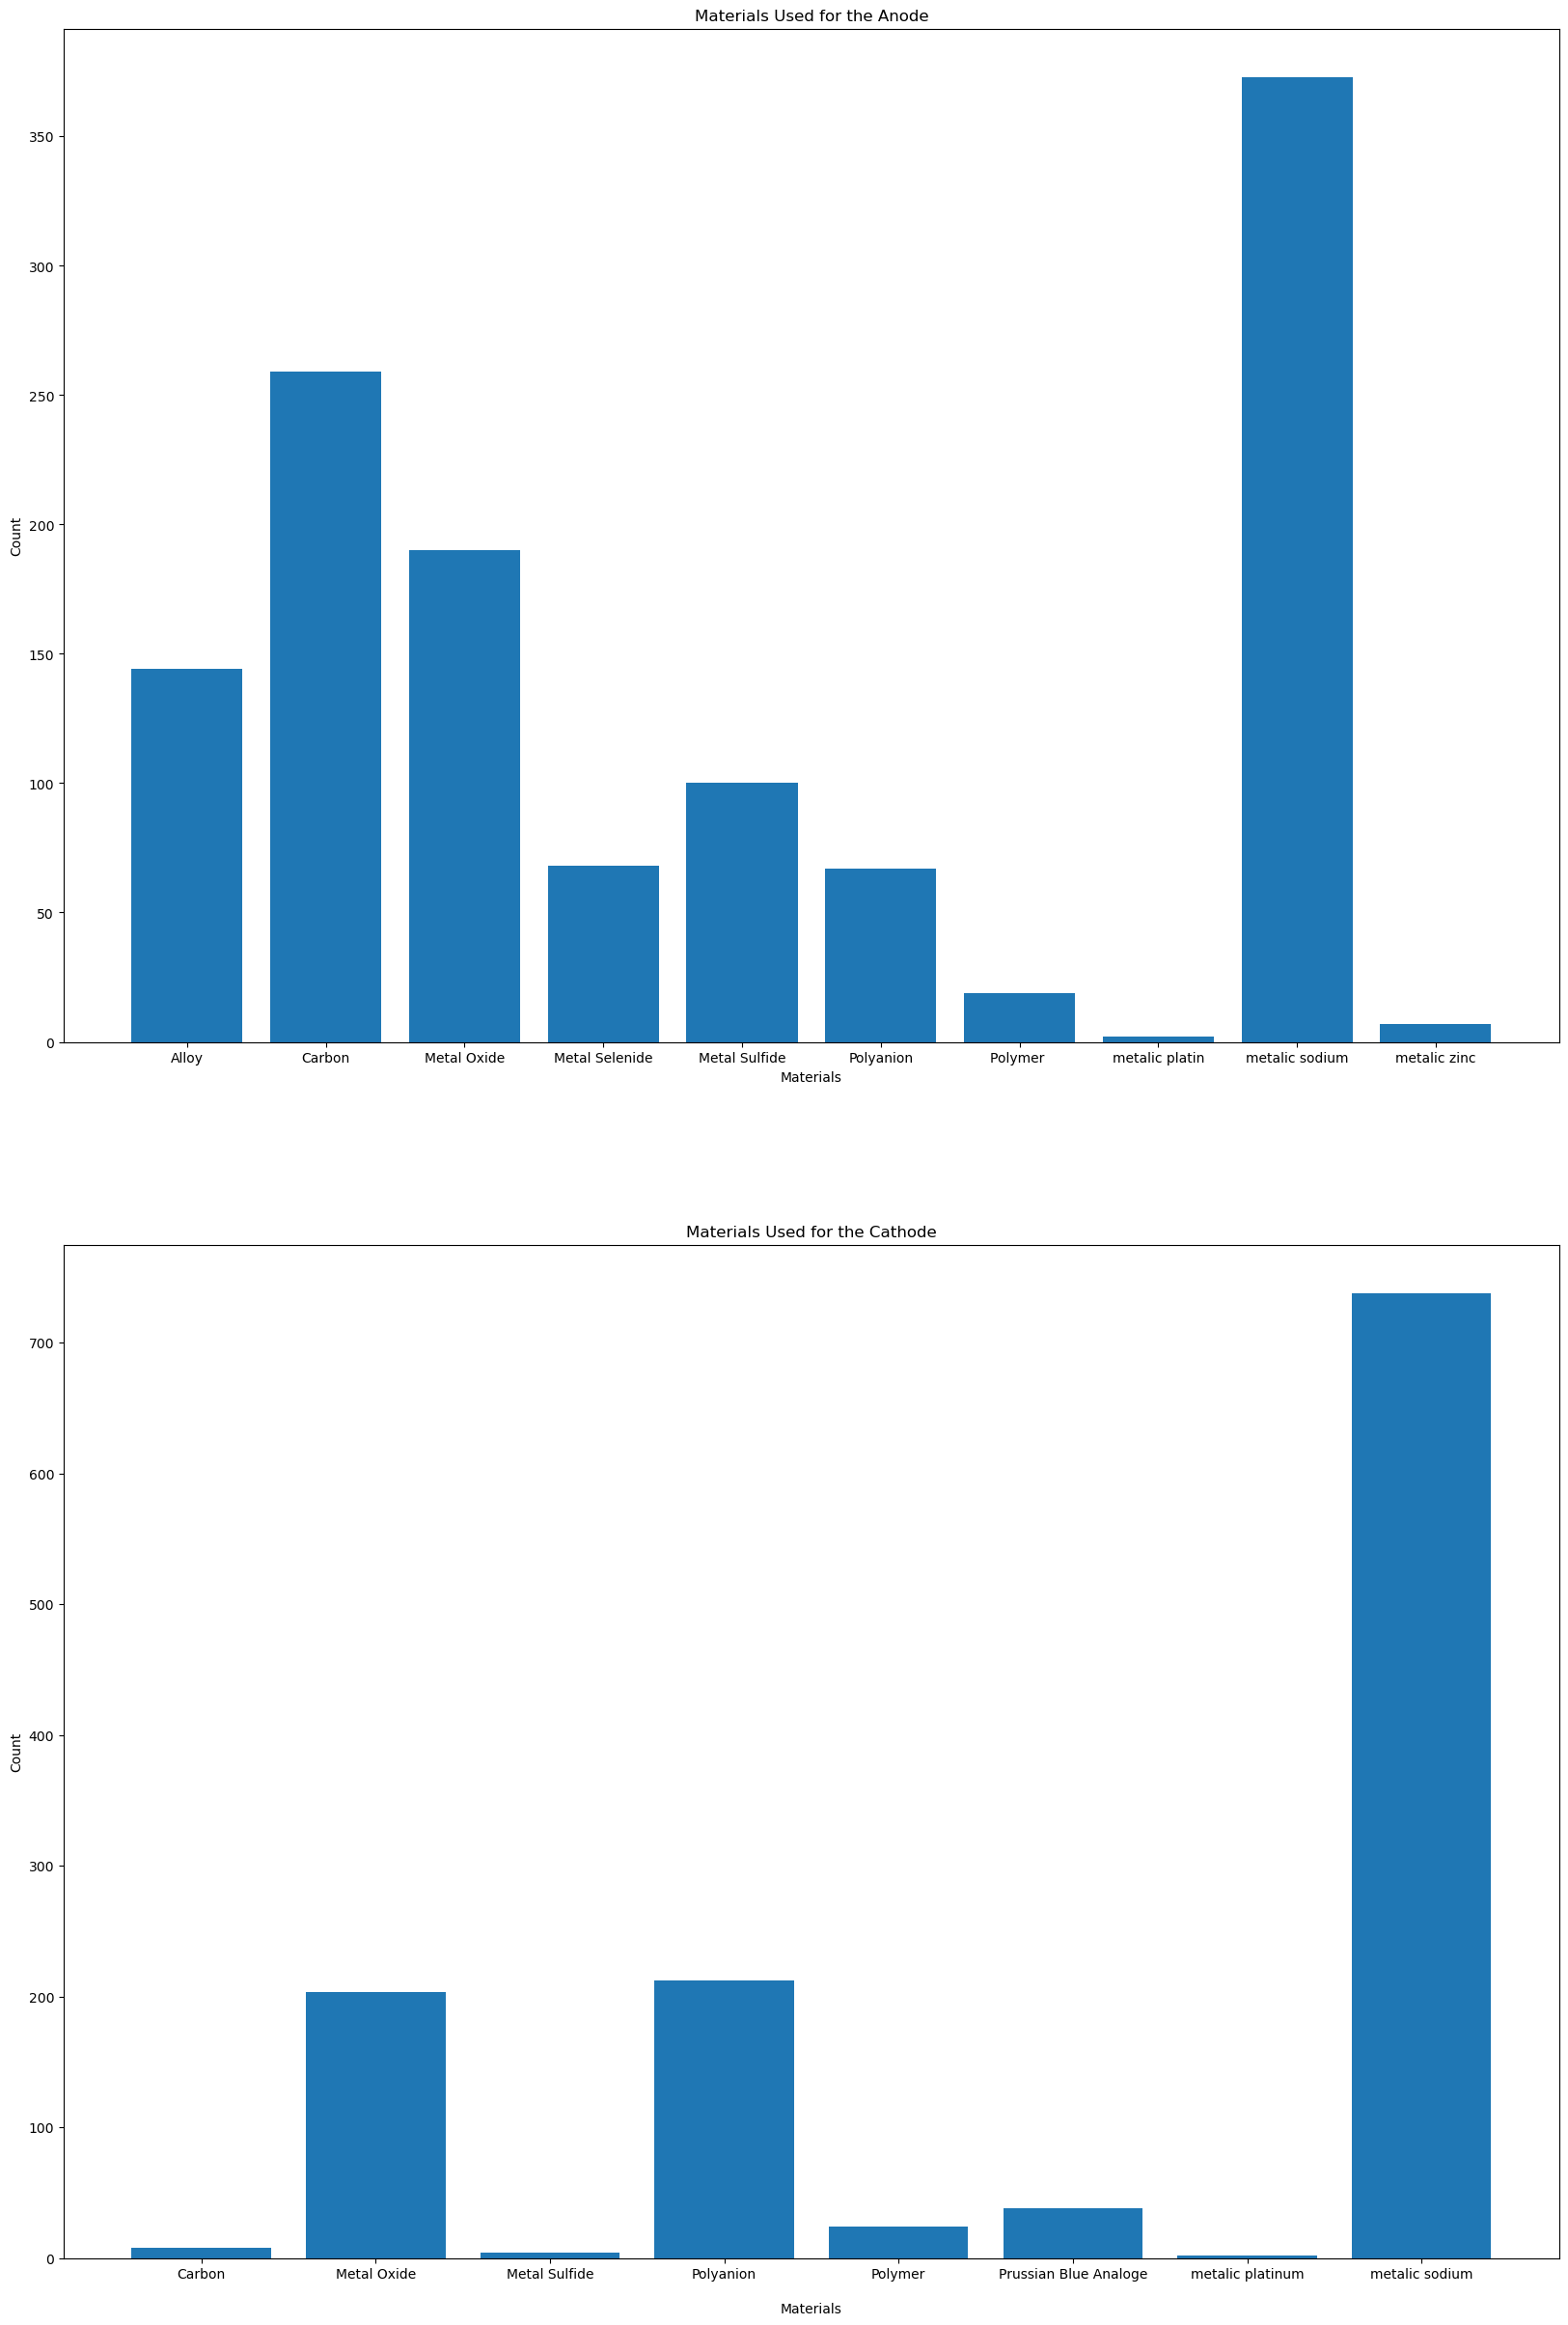

In [15]:
anode_group = read_data["Anode.Group"]
cathode_group = read_data["Cathode.Group"]
cathode_group_count = read_data.groupby("Cathode.Group").size()
anode_group_count = read_data.groupby("Anode.Group").size()

counts_cathode = []
counts_anode = []
anode_group_labels = anode_group_count.index
cathode_group_labels = cathode_group_count.index

for individual_counts in anode_group_count:
    counts_anode.append(individual_counts)

for individual_counts in cathode_group_count:
    counts_cathode.append(individual_counts)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 30))


ax1.bar(anode_group_labels, counts_anode)
ax1.set_title("Materials Used for the Anode")
ax1.set_xlabel("Materials")
ax1.set_ylabel("Count")


ax2.bar(cathode_group_labels, counts_cathode)
ax2.set_title("Materials Used for the Cathode")
ax2.set_xlabel("Materials")
ax2.set_ylabel("Count")
plt.savefig("Anode and Ca.png")

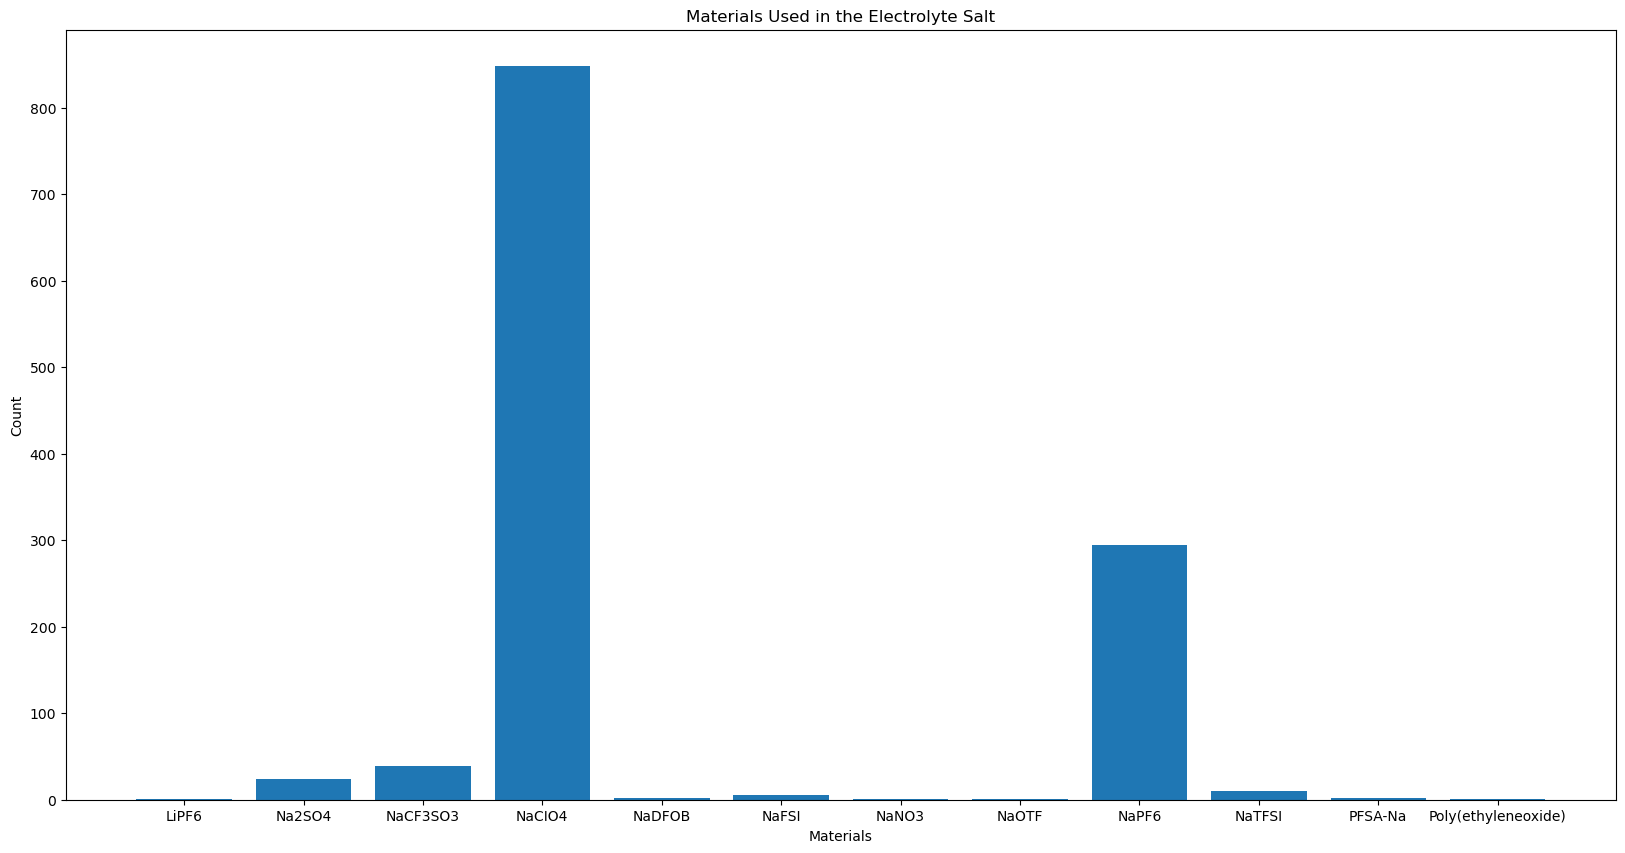

In [14]:
electrolyte_salt = read_data["Salt"]
counts_electrolyte = []
electrolyte_salt_count = read_data.groupby("Salt").size()
salt_group_labels = electrolyte_salt_count.index

for individual_counts in electrolyte_salt_count:
    counts_electrolyte.append(individual_counts)
    
plt.figure(figsize=(20,10))
plt.bar(salt_group_labels, counts_electrolyte)
plt.title("Materials Used in the Electrolyte Salt")
plt.xlabel("Materials")
plt.ylabel("Count")
plt.savefig("Electrolyte_Salt.png")


# Plot the crystal structures for cathode and anode

In [ ]:
anode_group = read_data["Anode.Group"]
cathode_group = read_data["Cathode.Group"]
cathode_group_count = read_data.groupby("Cathode.Group").size()
anode_group_count = read_data.groupby("Anode.Group").size()

counts_cathode = []
counts_anode = []
anode_group_labels = anode_group_count.index
cathode_group_labels = cathode_group_count.index

for individual_counts in anode_group_count:
    counts_anode.append(individual_counts)

for individual_counts in cathode_group_count:
    counts_cathode.append(individual_counts)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 30))


ax1.bar(anode_group_labels, counts_anode)
ax1.set_title("Materials Used for the Anode")
ax1.set_xlabel("Materials")
ax1.set_ylabel("Count")


ax2.bar(cathode_group_labels, counts_cathode)
ax2.set_title("Materials Used for the Cathode")
ax2.set_xlabel("Materials")
ax2.set_ylabel("Count")
plt.savefig("Anode and Cathode Crystal Structures.png")

In [1]:
retention_cycle_num = read_data["peak discharge capacity retention (%80) cycle number"]
numeric_data = pd.to_numeric(retention_cycle_num, errors='coerce')


for i in range(len(numeric_data)):
    if isinstance(retention_cycle_num[i], str) and '+' in retention_cycle_num[i]:
        numeric_data[i] = float(retention_cycle_num[i].replace('+', ''))

threshold = 10000
outliers = numeric_data[numeric_data > threshold]
# print(outliers)

peak_discharge_capacity = read_data["peak discharge capacity. (mAh/g)"]
peak_discharge_np = peak_discharge_capacity.to_numpy()
peak_discharge_np = np.delete(peak_discharge_np, outliers.index)

read_data["peak discharge capacity retention (%80) cycle number"] = numeric_data
retention_np = np.array(numeric_data)
retention_np = np.delete(retention_np, outliers.index)

read_data.to_excel('file.xlsx', index=False)


NameError: name 'read_data' is not defined

Step 2 Normalize "Y" values

In [4]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
clean_sheet = pd.read_excel("sodium_batteries.xlsx", sheet_name="Cleaned Sheet")


In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

clean_sheet = pd.read_excel("sodium_batteries.xlsx", sheet_name="Cleaned Sheet")
categorical_cols = ["Anode.Group", "Cathode.Group", "Salt", "Anode.Crystal Structure", "Cathode.Crystal Structure"]

encoded_categories = pd.get_dummies(clean_sheet, columns=categorical_cols)

Y1 = clean_sheet["peak discharge capacity. (mAh/g)"]
Y2 = clean_sheet["peak discharge capacity retention (%80) cycle number"]

# we clearly need to normalize our Y values but should we do z score normalization or
# min max normalizing ? We'll do both and see one performs better in our model

Y1_min = np.min(Y1)
Y1_max = np.max(Y1)
Y2_min = np.min(Y2)
Y2_max = np.min(Y2)

Y1_min_max_norm = (Y1 - Y1_min)/(Y1_max - Y1_min)
Y2_min_max_norm = (Y2 - Y2_min)/(Y2_max - Y2_min)

Y1_mean = np.mean(Y1)
Y1_std = np.std(Y1)
Y2_mean = np.mean(Y2)
Y2_std = np.std(Y2)

X_values = encoded_categories.drop(columns=["peak discharge capacity. (mAh/g)", "peak discharge capacity retention (%80) cycle number"]).values

# encode the categorical variables

X_train, X_test, Y_train, Y_test = train_test_split(X_values, np.column_stack((Y1_min_max_norm, Y2_min_max_norm)), test_size=.2, random_state=18)

random_forest = RandomForestRegressor(n_estimators=100, random_state=18)
random_forest.fit(X_train, Y_train)

print(Y2)
y_pred = random_forest.predict(X_test)
y_pred_denormal = y_pred * np.array([Y1_max - Y1_min, Y2_max - Y2_min]) + np.array([Y1_min, Y2_min])
print(np.mean(y_pred_denormal))



feature_importances = random_forest.feature_importances_
print(feature_importances)


ValueError: Input y contains NaN.